In [19]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
#hide
#skip
! [ -e /content ] && pip install -Uqq fastai  # upgrade fastai on colab

In [21]:
from fastai.vision.all import *

In [22]:
path = Path('/content/drive/MyDrive/images')

In [23]:
path.ls()

(#9) [Path('/content/drive/MyDrive/images/donuts'),Path('/content/drive/MyDrive/images/octopus'),Path('/content/drive/MyDrive/images/dog'),Path('/content/drive/MyDrive/images/cat'),Path('/content/drive/MyDrive/images/starfish'),Path('/content/drive/MyDrive/images/horse'),Path('/content/drive/MyDrive/images/tomato'),Path('/content/drive/MyDrive/images/waterbottle'),Path('/content/drive/MyDrive/images/christmastree')]

In [24]:
files = get_image_files(path)
len(files)

968

In [25]:
dls = ImageDataLoaders.from_folder(path, valid_pct=0.2, item_tfms=Resize(224))
dls.valid_ds.items[:3]

[Path('/content/drive/MyDrive/images/christmastree/cc2b6b629b.jpg'),
 Path('/content/drive/MyDrive/images/tomato/98f313fe3f.jpg'),
 Path('/content/drive/MyDrive/images/donuts/087bce4c7d.jpg')]

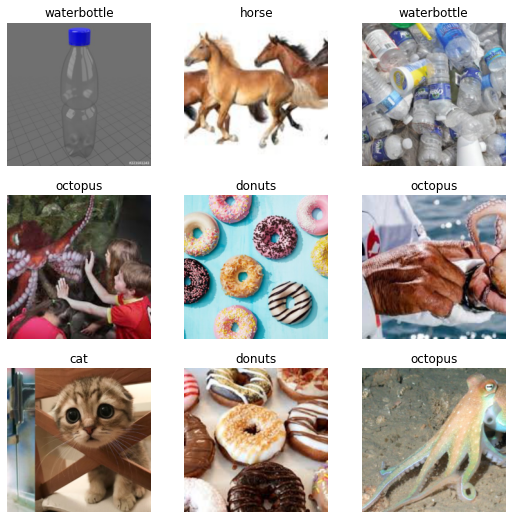

In [26]:
dls.show_batch()

In [27]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)

epoch,train_loss,valid_loss,error_rate,time
0,2.049526,0.198786,0.051813,02:37


epoch,train_loss,valid_loss,error_rate,time
0,0.168329,0.047673,0.010363,00:18


In [28]:
learn.predict(files[50])

('donuts',
 tensor(3),
 tensor([3.2226e-07, 5.1258e-07, 9.5078e-08, 9.9998e-01, 3.9808e-07, 1.3746e-06,
         1.1178e-05, 1.5498e-07, 1.1213e-06]))

In [29]:
files[100]

Path('/content/drive/MyDrive/images/donuts/ac234e265d.jpg')

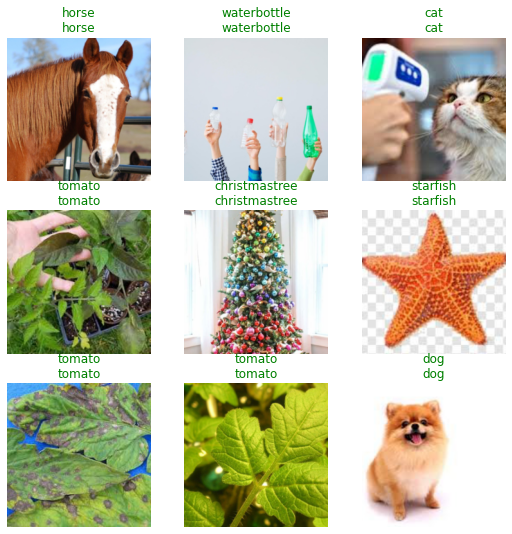

In [30]:
learn.show_results()

In [43]:
# Test on a new image
test_path = '/content/drive/MyDrive/Colab Notebooks'
test_animal = 'test_man.jpg'
learn.predict(test_path + '/' + test_animal)

('tomato',
 tensor(7),
 tensor([0.0522, 0.0930, 0.1034, 0.0013, 0.1923, 0.0008, 0.1645, 0.2163, 0.1763]))

In [ ]:
learn.lr_find()